# CSCI-P556
## Assignment 1
### Due date: 5:30PM, September 26, 2018


---



## Question 1: Binary Classification (35 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Like we did in linear regression, let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

### Task 1
Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 and $k_1$ points on the side of class 1. Use the function you wrote in the previous assignment to plot this dataset!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
import random
def plotLineAndPoints(l1, l2, c = None):
  ### Your code goes here
    plt.plot(*zip(*l1), 'r+', label = 'points_k1')
    plt.plot(*zip(*l2), 'bo', label = 'points_k2')
    
    if c:
        x = np.linspace(-10,10,2)
        y = ((-1*c[0])/c[1])*x - c[2]/c[1]
        plt.plot(x, y, 'g', label = 'Randomly Generated- ax+by+c')

def generate_dataset(k1, k2):
    k_1 = k1
    k_2 = k2
    a = random.randint(-10, 10)
    b = 0
    while b == 0:
        b = random.randint(-10, 10)
    c = random.randint(-10, 10)
    points_k1 = []
    points_k2 = []
    while k1 > 0 or k2 > 0:
        x = random.randint(-10, 10)
        y = random.randint(-10, 10)
        if a*x + b*y + c > 0 and k1 > 0:
            k1 = k1 - 1
            l = [x, y]
            points_k1.append(l)
        elif a*x + b*y + c < 0 and k2 > 0:
            k2 = k2 - 1
            l = [x, y]
            points_k2.append(l)
    plotLineAndPoints(points_k1, points_k2, (a, b, c))
    X = points_k1 + points_k2
    y = [1]*k_1 + [-1]*k_2
    
    #Calling the fit function and plotting both the lines
    w = fit(X,y)
    x = np.linspace(-10,10,2)
    cc = [w[1], w[2], w[0]]
    y = ((-1*cc[0])/cc[1])*x - cc[2]/cc[1]
    plt.plot(x, y, 'r', label = 'wixi - line generated by fit function')
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.legend(loc='upper left')
    return X, y
    
#generate_dataset(5, 3)
#Calling this function from below and plotting both the lines together

### Task 2

When you are given a dataset for which you do not have access the the target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$. You learn it from the data. In this problem, it is akin to learning the parameters of the line that separates the two classes. The same line above can be represented as $$\sum_{i=0}^d w_i x_i = 0$$
Notice that $i$ starts from $0$, instead of $1$. Can you think of why?

The goal here is to correctly find out $\bf{w}$. The algorithm to find it is a simple iterative process. 
1. Randomly choose a $w$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
3. Randomly choose a sample from the dataset and see if it is correctly classified. If yes,  move on to another sample.
4. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$ , where 
    *   $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
    *   $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
    *  $y$ is the class label for the sample under consideration
    * $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.





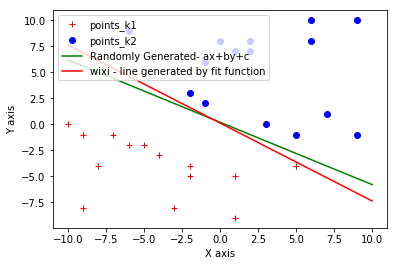

In [38]:
def fit(X, y):
    i = 0
    w = np.ones(len(X[0]) + 1, dtype = int)
    X = np.c_[np.ones(len(y)), X]
    while i < len(y):
        if((np.dot(w, X[i]) > 0 and y[i] == 1) or (np.dot(w, X[i]) < 0 and y[i] == -1)):
            i = i + 1
        else:
            w = w + y[i] * X[i]
            i = 0
    return w
    
X, y = generate_dataset(15,15) #Generates dataset and plots both the lines

### Task 3
Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required.

### Task 3 -  Answer:

Here the intuition behing this algorithm is - We are adjusting weights which simply means adjusting slope and intercepts of the straight line to fit the data. Updating the weights will gradually result in a line which classifies the training sample with lesser and lesser errors.
$$h(\theta) = \bar{x}.\bar{W} = |X|*|w|*\cos{\alpha}$$

So by adding $\pm X$ to the weight vector w, we are changing the angle between those vectors from 0-90deg interval to 90-180deg interval and vice-versa, thus changing the the sign of cos value in the dot product.(Magnitudes are always positive anyways)

### Task 4
What happens when the data is not linearly separable? What can be done to salvage the situation?

### Task 4 -- Answer

The above method can't be used when the data is linearly non-seperable. It will never get to the state with all the input vectors classified correctly.
So in this situation, as taught in the class by learning to transform the input features into a new representation where the problem becomes linear. 
We should find a linear transform of it in another space and solve it.

## Question 2: Linear Regression (40 points)

There are two ways of solving the linear regression problem. The first one is called ordinary least squares, where you learn the parameters of the model by using the closed-form differentitaion of the standard cost function. This method cannot be used if there is no closed-form solution to the derivative of the cost function. In this case, we resort to gradient descent which learn the parameters by iteratively updating them until it reaches the solution i.e. the minimum of the cost function. In this problem we are going to explore both of these implementations. 

Using the code that we are providing in the next few cells, you will:


1. Implement linear regression using the ordinary least squares method
2. Implement linear regression using gradient descent
3. Execute both versions of the linear regression on sklearn's Boston Housing dataset. Plot your results. Which version executes faster? Explain why that is the case.

### Answer for 3:

In this case OLS is preferred over the Gradient Descent method.
Reason being, the very small sample size given.
Main reason why Gradient descent is widely used for linear regression is because of the computational complexity of the OLS method. OLS calculates the $(X^TX)^-1$ which is very complex, and when data size given is above 1000, the computation gets complex.
But in this case the OLS method executes faster, as the sample size is small. Gradient Descent takes longer to converge because of small learning rate we choose.

In [22]:
def normalize(a):
    mu = np.mean(a)
    sigma = np.std(a)
    if sigma!=0:
        for i in range(len(a)):
            a[i] = (a[i] - mu)/sigma
    else:
        for i in range(len(a)):
            a[i] = 1
        
def feature_normalize(X):
    
    n = X.shape[1]
    X_norm = X
    mu = np.mean(X_norm, axis = 0)
    sigma = np.std(X_norm, axis = 0)
    np.apply_along_axis(normalize, 0, X_norm)
    
    return X_norm, mu, sigma

In [23]:
def cost_function(X, y, theta):
    
    m = y.size
    cost = 0
    for i in range(X.shape[0]):
        cost = cost + (y[i] - np.dot(theta, X[i]))**2
    cost = cost/(2*X.shape[0])

    return cost

In [24]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    temp_theta = theta
    for i in range(0, num_iters):
        for j in range(X.shape[1]):
            temp_theta[j] = theta[j] - ((learning_rate/m) * np.sum(np.multiply(np.matmul(X, theta) - y, X[:,j])))
        theta = temp_theta
        J_history[i] = cost_function(X, y, theta)
    return theta, J_history

In [25]:
def linearRegression_ols(X, y):
    
    XtX = X.T.dot(X)
    Xty = X.T.dot(y)
    theta = np.linalg.solve(XtX, Xty)

    return theta

In [26]:
# load dataset
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [27]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
Theta computed from gradient descent : 
[22.53269111 -0.80239439  0.87277546 -0.22730485  0.73507717 -1.70648801
  2.82933669 -0.07811177 -2.86696541  1.6245611  -1.02582389 -1.97650381
  0.86958423 -3.67767292]


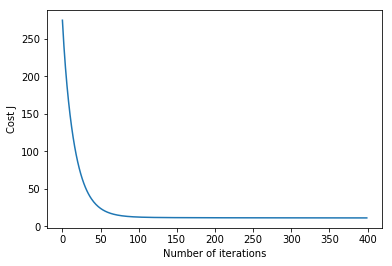

In [28]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400

# Initialize theta and execute gradient descent
theta = np.zeros(14)
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
#print(J_history)
# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result
print('Theta computed from gradient descent : \n{}'.format(theta))

In [29]:
# Now we are going to use the ordinary least squares (OLS) linear regression

# re-load dataset

from sklearn.datasets import load_boston
dataset = load_boston()

X = dataset.data
y = dataset.target

X = np.c_[np.ones(m), X] # Add intercept term to X

theta = linearRegression_ols(X, y)

# Display normal equation's result
print('Theta computed from OLS linear regression : \n{}'.format(theta))

Theta computed from OLS linear regression : 
[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


Now lets do gradient descent with L2-regularization (or Ridge Regression). The next 6 cells are a copy of the template that we provided above with a '_regularization' added at the end of the function name. Feel free to reuse the code that you wrote above but be sure to make the appropriate modifications to the necessary functions to add L2-regularization.

In [30]:
def normalize(a):
    mu = np.mean(a)
    sigma = np.std(a)
    if sigma!=0:
        for i in range(len(a)):
            a[i] = (a[i] - mu)/sigma
    else:
        for i in range(len(a)):
            a[i] = 1
        
def feature_normalize_regularization(X):
    
    n = X.shape[1]
    X_norm = X
    mu = np.mean(X_norm, axis = 0)
    sigma = np.std(X_norm, axis = 0)
    np.apply_along_axis(normalize, 0, X_norm)
    
    return X_norm, mu, sigma

In [31]:
def cost_function_regularization(X, y, theta, lamb):
    '''
    In this function we are going to... you guessed it...
    Implement the cost function!
 
    '''
    m = y.size
    cost = 0
    for i in range(X.shape[0]):
        cost = cost + (y[i] - np.dot(theta, X[i]))**2
    cost = cost + lamb * np.sum(np.square(theta))
    cost = cost/(2*X.shape[0])

    return cost

In [32]:
def gradient_descent_regularization(X, y, theta, learning_rate, num_iters, lamb):
    m = y.size
    J_history = np.zeros(num_iters)
    temp_theta = theta
    for i in range(0, num_iters):
        for j in range(X.shape[1]):
            temp_theta[j] = theta[j] * (1 - ((learning_rate/m)*lamb)) - ((learning_rate/m) * np.sum(np.multiply(np.matmul(X, theta) - y, X[:,j])))
        
        J_history[i] = cost_function_regularization(X, y, theta, lamb)
    print(J_history)

    return theta, J_history

In [33]:
# load dataset

from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target
m = y.size

In [34]:
# Normalize features
print('Normalizing Features ...')

X, mu, sigma = feature_normalize_regularization(X)
X = np.c_[np.ones(m), X]  # Add a column of ones to X

Normalizing Features ...


Running gradient descent ...
[275.15948212 256.74211417 240.28331087 225.3984184  211.80920837
 199.31150151 187.75283622 177.01705424 167.01365011 157.67040192
 148.92826272 140.73781004 133.05676963 125.84828039 119.07967122
 112.72159176 106.74738819 101.13264933  95.85487115  90.89320424
  86.22825958  81.8419556   77.71739484  73.83876202  70.19123784
  66.76092455  63.53478063  60.50056236  57.64677121  54.9626057
  52.43791732  50.06316968  47.82940064  45.72818706  43.75161188
  41.89223332  40.14305609  38.49750434  36.94939637  35.49292083
  34.12261444  32.83334099  31.62027171  30.47886675  29.40485784
  28.39423198  27.44321608  26.54826259  25.70603597  24.91339994
  24.16740556  23.46527997  22.80441589  22.18236162  21.59681179
  21.04559855  20.52668338  20.03814929  19.57819362  19.14512113
  18.73733761  18.35334386  17.99172995  17.65116993  17.33041682
  17.02829784  16.74371004  16.47561608  16.22304035  15.98506525
  15.76082777  15.54951619  15.35036704  15.1626

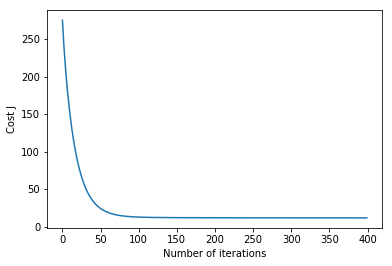

In [35]:
# Now we proceed with Gradient Descent

print('Running gradient descent ...')

# Choose some alpha value
alpha = 0.03
num_iters = 400
lamb = 1

# Initialize theta and execute gradient descent
theta = np.zeros(14)
theta, J_history = gradient_descent_regularization(X, y, theta, alpha, num_iters, lamb)

# Plot the convergence graph
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display gradient descent's result

print('Theta computed from gradient descent : \n{}'.format(theta))

## Question 3: Guess the function (25 points)

Consider three datasets provided with this notebook, namely `data1.csv` and `data2.csv`. Each dataset has 1000 samples. Every sample has 5 features $x_1, x_2, \ldots, x_5$ and a target variable $y$. In each of the datasets, the target variable has been generated from the features of a different unknown function $y$. In general, $$y=f(\mathbf{x})=\sum_{j} w_j \prod_{i=1}^5 x_i^{k_{i;j}}$$ where $x_i$ is the $i^{\text {th}}$ feature and $j$ denotes a particular term in the polynomial and $k_{i;j}$ is the power of the $i^{\text{th}}$ feature in the $j^{\text{th}}$ term. It can be any whole number from $0$ to $3$.

Thus $y_1=f_1(\mathbf{x})$;  $y_2=f_2(\mathbf{x})$ and $y_3=f_3(\mathbf{x})$.

1. Find both the unknown target functions using the given datasets. Use the dedicated cells defined below to write the corresponding methodology and code.
2. Define all your variables such that when we run the corresponding code cell, it should nicely print the correct output which supports your methodology and also prints the right answer.

#### Hints:
1. Rounding off will make things easy and we encourage it. For instance, you can write 2.98 as 3!

### Methodology and answer for function 1

As given the model is a degree 1 polynomial, hence by solving for $\sum_{i=0}^5 w_i x_i = 0$ as model, using the gradient descent function written above, the cost coverges close to 0 in about 40-50 iterations.

[4.41891900e-01 3.90541211e-01 3.45162053e-01 3.05059945e-01
 2.69621177e-01 2.38303416e-01 2.10627403e-01 1.86169619e-01
 1.64555800e-01 1.45455210e-01 1.28575578e-01 1.13658624e-01
 1.00476105e-01 8.88263253e-02 7.85310435e-02 6.94327486e-02
 6.13922475e-02 5.42865349e-02 4.80069105e-02 4.24573153e-02
 3.75528617e-02 3.32185337e-02 2.93880392e-02 2.60027954e-02
 2.30110321e-02 2.03669995e-02 1.80302678e-02 1.59651087e-02
 1.41399489e-02 1.25268861e-02 1.11012629e-02 9.84128893e-03
 8.72770771e-03 7.74350174e-03 6.87363232e-03 6.10480929e-03
 5.42528781e-03 4.82468856e-03 4.29383900e-03 3.82463303e-03
 3.40990696e-03 3.04332995e-03 2.71930713e-03 2.43289407e-03
 2.17972108e-03 1.95592644e-03 1.75809734e-03 1.58321761e-03
 1.42862168e-03 1.29195379e-03 1.17113196e-03 1.06431617e-03
 9.69880234e-04 8.86386916e-04 8.12565996e-04 7.47294837e-04
 6.89581231e-04 6.38548239e-04 5.93420791e-04 5.53513847e-04
 5.18221933e-04 4.87009891e-04 4.59404709e-04 4.34988300e-04
 4.13391117e-04 3.942865

Text(0,0.5,'Cost J')

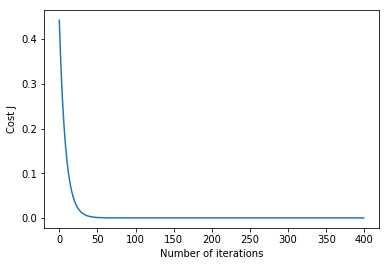

In [37]:
#Model as degree 1 polynomial

data1 = pd.read_csv("data1.csv", header = None)
X = data1.iloc[:,:data1.shape[1]]
X = X.values
y = data1.iloc[:,5]
X, mu, sigma = feature_normalize_regularization(X)
alpha = 0.03
num_iters = 400
lamb = 1
w = np.zeros(X.shape[1])
w, J_history = gradient_descent_regularization(X, y, w, alpha, num_iters, lamb)
print(w)
plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

### Methodology for function 2:

With the given data, we neither have any labels for values in the data, nor we are aware of the problem we are solving. So, we can't make any assumptions or extrapolation of features in this case.
So, here I am generating a $4^5$ permutations of all possible features with polynomial degree upto 15 and assigning a weitage to each of those permutations. I have printed the resulting model function(with all 1024 terms) using python-markdown library which is commented in the below code.


I tried 2 methods here, the linear regression method from scikit-learn and the gradient descent technique from q2.
Using the gradient descent algorithm, the cost converges close to 0 after 100 iterations for learning rate = 0.03
Using the scikit-learn linear regression, the Mean squared error comes as low as 2*(10^-26), thus y_actual and y_predicted values are exactly the same for all the given samples(for upto 4 decimal points).

In [20]:
## Code for function 2
import itertools
from IPython.display import display, Markdown
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

k = [0, 1, 2, 3]
w = [0]*((4**5))
data2 = pd.read_csv("data2.csv", header = None)
X = np.zeros((data2.shape[0], len(w)))
y = data2.iloc[:,5]
y_temp = y

print("Generating X.....")


#Generating 'X' with 4^5 permutations of possible features
for i in range(data2.shape[0]):
    data = data2.iloc[i]
    X[i] = [((data[0]**p[0])*(data[1]**p[1])*(data[2]**p[2])*(data[3]**p[3])*(data[4]**p[4])) for p in itertools.product(k, repeat=5)]

#Normalizing X
X, mu, sigma = feature_normalize_regularization(X)

# Choose some alpha, lambda and No.of iterations
alpha = 0.03
num_iters = 100
lamb = 1

#Solving using the scikit_learn linear regression function
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)
w = regr.coef_
print("Co-efficients: ---- >")
print(w)
print("\n")
mse = mean_squared_error(y, y_pred)
r_squared = (y, y_pred)
print("Mean Squared Error ----> " + str(mse))
print("\n")
d = {'y_actual': y, 'y_predicted': y_pred}
df = pd.DataFrame(data = d)
print(df)

#To solve using above gradient descent method
#w, J_history = gradient_descent_regularization(X, y, w, alpha, num_iters, lamb)

#Below code prints the model function with all 1024 terms, using the python-markdown library
'''i = 0
str1 = '$'
for p in itertools.product(k, repeat=5):
    str1 = str1 + str(w[i])
    for j in range(5):
        str1 = str1 + 'x_{' + str(j+1) +'}^' + str(p[j])
    str1 = str1 + ' + '
    i = i + 1
str1 = str1 + '$'
display(Markdown(str1))'''

#Plots the cost function value vs No.of iterations
'''plt.figure()
print(J_history.size)
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')'''

Generating X.....
Co-efficients: ---- >
[ 5.74410741e-10  3.92872766e-05  1.24027348e-03 ... -5.94673757e+00
  5.73767204e+00 -6.26943570e+00]


Mean Squared Error ----> 2.0427856957687572e-26


     y_actual  y_predicted
0     82.7389      82.7389
1     44.6709      44.6709
2     35.3125      35.3125
3     51.4025      51.4025
4     38.8274      38.8274
5     42.0783      42.0783
6     72.2481      72.2481
7     88.2421      88.2421
8     46.3091      46.3091
9     17.7641      17.7641
10    72.7030      72.7030
11    39.7919      39.7919
12    42.1430      42.1430
13    25.5811      25.5811
14    39.6951      39.6951
15    58.8851      58.8851
16    29.4214      29.4214
17    39.2816      39.2816
18    43.5309      43.5309
19    39.2575      39.2575
20    -4.7677      -4.7677
21    41.7902      41.7902
22    41.5487      41.5487
23    42.5028      42.5028
24    46.1003      46.1003
25    38.1666      38.1666
26    61.4804      61.4804
27    41.0977      41.0977
28    43.3792      43.

"plt.figure()\nprint(J_history.size)\nplt.plot(np.arange(J_history.size), J_history)\nplt.xlabel('Number of iterations')\nplt.ylabel('Cost J')"